In [ ]:
!pip install scikit-plot

# Przygotowanie modelu do oceny

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

Załadowanie danych

In [ ]:
features, target = load_breast_cancer(return_X_y=True, as_frame=True)
data = features.join(target)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
train, test = train_test_split(data, random_state=47, test_size=0.4)

In [ ]:
test_features = test.drop(columns="target")
test_target = test["target"]

Załadowanie modelu

In [ ]:
model_names = ['AdaBoostClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'MLPClassifier', 'Pipeline', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier']



In [ ]:
evaluated_model = model_names[1]

with open(evaluated_model, 'rb') as f:
    classifier = pickle.load(f)

Predykcja

In [ ]:
prediction = classifier.predict(test_features)

In [ ]:
prob_prediction = classifier.predict_proba(test_features)

# Ocena przy pomocy metryk

Confusion Matrix

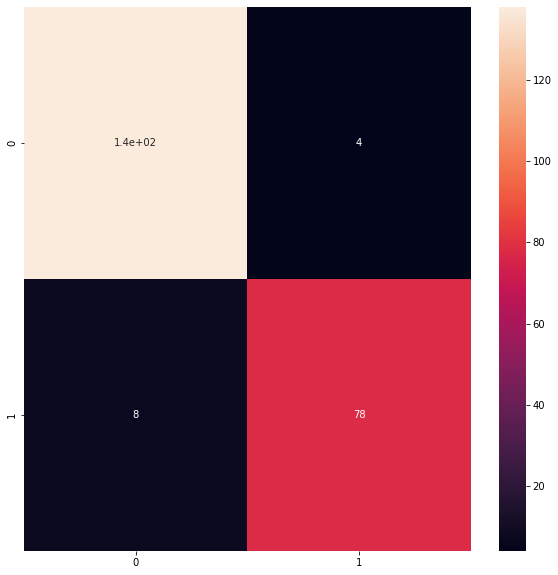

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_target, prediction)
tn, fp, fn, tp = confusion_matrix.ravel()
plt.subplots(figsize=(10,10))
sns.heatmap([[tp, fp], [fn, tn]], annot=True)

Błąd typu pierwszego | False positive rate

In [ ]:
false_positive_rate = fp / (fp + tn)

Błąd typu drugiego | False negative rate


In [ ]:
false_negative_rate = fn / (tp + fn)

Specifity | True negative rate

In [ ]:
true_negative_rate = tn / (tn + fp)

Negative predictive value

In [ ]:
negative_predictive_value = tn / (tn + fn)

False discovery rate

In [ ]:
false_discovery_rate = fp/ (tp + fp)

Sensivity | Recall | True postive rate

In [ ]:
recall_score = tp / (tp + fn)

Precision | Positive predictive value

In [ ]:
precision_score = tp/ (tp + fp)

Accuracy

In [ ]:
accuracy = (tp + tn) / (tp + fp + fn + tn) 

F beta score

In [ ]:
beta = 0.5 # TODO
f_beta_score = (1 + np.square(beta)) * precision_score * recall_score / (np.square(beta) * precision_score + recall_score)

F1 score

In [ ]:
f1_beta_score = 2* precision_score * recall_score / (precision_score + recall_score)

F2 score

In [ ]:
f2_beta_score = 5 * precision_score * recall_score / (4*precision_score + recall_score)

Cohen Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa = cohen_kappa_score(test_target, prediction)

Matthews correlation coefficient

In [ ]:
matthew_correlation_coefficient = (tp * tn - fp * fn)/(tp + fp)*(tp * fn)*(tn + fp)*(tn + fn)

ROC AUC score

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target, prediction)

PR AUC | Average precision

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_target, prediction)

Log loss

In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(test_target, prob_prediction)

Brier score

In [ ]:
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(test_target, prediction)

ROC curve

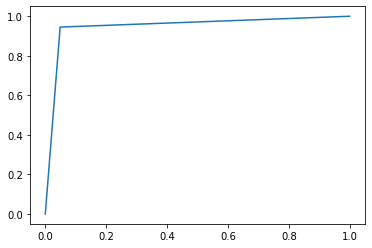

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_target, prediction)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)

Precision-Recall curve

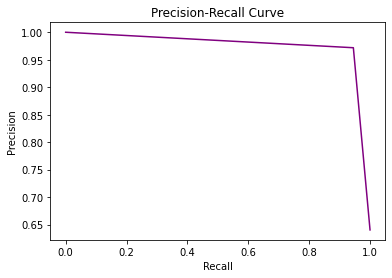

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds  =precision_recall_curve(test_target, prob_prediction[:,1])

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

Cumulative gain chart

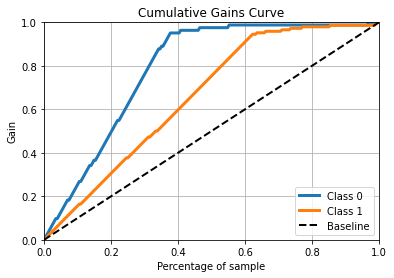

In [ ]:
from scikitplot.metrics import plot_cumulative_gain

plot_cumulative_gain(test_target, prob_prediction)


**Lift** curve | Lift chart

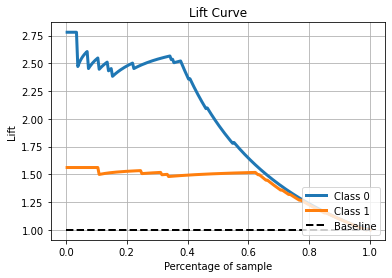

In [ ]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(test_target, prob_prediction)

Kolmogorov-Smirnov plot

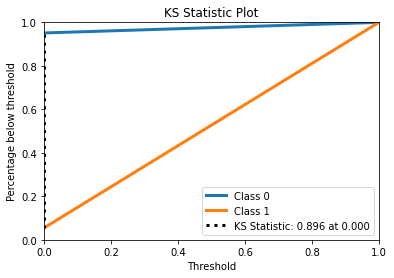

In [ ]:
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(test_target, prob_prediction)

# Summary

In [ ]:
print(f"False positive rate | Type-I error: {false_positive_rate:>30} \n" +
      f"False negative rate | Type-II error: {false_negative_rate:>12} \n" +
      f"True negative rate | Specificity: {true_negative_rate:>30} \n" +
      f"Negative predicitve value: {negative_predictive_value:>22} \n" +
      f"False discovery rate: {false_discovery_rate:>44} \n" +
      f"True positive rate | Recall | Sensivity: {recall_score:>8} \n" +
      f"Positive predictive value | Precision: {precision_score:>25} \n" +
      f"Accuracy: {accuracy:>53} \n" +
      f"F beta score: {f_beta_score:>50} \n" +
      f"F1 score: {f1_beta_score:>54} \n" +
      f"F2 score: {f2_beta_score:>54} \n" +
      f"Cohen Kappa: {cohen_kappa:>51} \n" +
      f"Matthews correlation coefficient: {matthew_correlation_coefficient:>15} \n" +
      f"ROC AUC score: {roc_auc:>49} \n" +
      f"PR AUC | Average precision: {average_precision:>36} \n" +
      f"Log loss: {loss:>55} \n" +
      f"Brier score: {brier_score:>53} \n")

False positive rate | Type-I error:            0.04878048780487805 
False negative rate | Type-II error: 0.0547945205479452 
True negative rate | Specificity:             0.9512195121951219 
Negative predicitve value:     0.9069767441860465 
False discovery rate:                         0.028169014084507043 
True positive rate | Recall | Sensivity: 0.9452054794520548 
Positive predictive value | Precision:         0.971830985915493 
Accuracy:                                    0.9473684210526315 
F beta score:                                 0.9663865546218487 
F1 score:                                     0.9583333333333334 
F2 score:                                     0.9504132231404959 
Cohen Kappa:                                  0.8869421487603306 
Matthews correlation coefficient: 588401398.9859155 
ROC AUC score:                                0.9482124958235884 
PR AUC | Average precision:                   0.9536676922868623 
Log loss:                                      1.

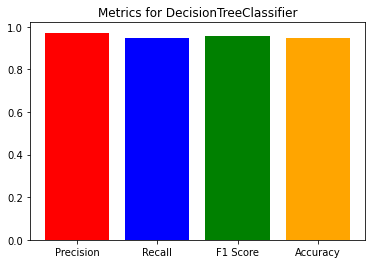

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

def make_plot(list_1, list_2, plot_title, colors=None):
    plt.bar(list_1, list_2, color=colors)
    plt.title(f"{plot_title}")
    plt.savefig(f"{plot_title}")
    plt.show()
    plt.clf()

x = ["Precision", "Recall", "F1 Score", "Accuracy"]
y = [precision_score, recall_score, f1_beta_score, accuracy]
c = ["red", "blue", "green", "orange"]
make_plot(x, y, f"Metrics for {evaluated_model}", c)